In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

%matplotlib inline
sns.set_style("darkgrid")

In [3]:
crimes=pd.read_csv('data/Crimes_-_2001_to_Present.csv')

In [4]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [5]:
crimes.columns = crimes.columns.str.strip()
crimes.columns = crimes.columns.str.replace(',', '')
crimes.columns = crimes.columns.str.replace(' ', '_')
crimes.columns = crimes.columns.str.lower()

In [6]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311030 entries, 0 to 7311029
Data columns (total 22 columns):
id                      int64
case_number             object
date                    object
block                   object
iucr                    object
primary_type            object
description             object
location_description    object
arrest                  bool
domestic                bool
beat                    int64
district                float64
ward                    float64
community_area          float64
fbi_code                object
x_coordinate            float64
y_coordinate            float64
year                    int64
updated_on              object
latitude                float64
longitude               float64
location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.1+ GB


In [7]:
crimes[crimes.duplicated(keep=False)]

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location


In [8]:
crimes.drop(['id','case_number','location'],axis=1,inplace=True)

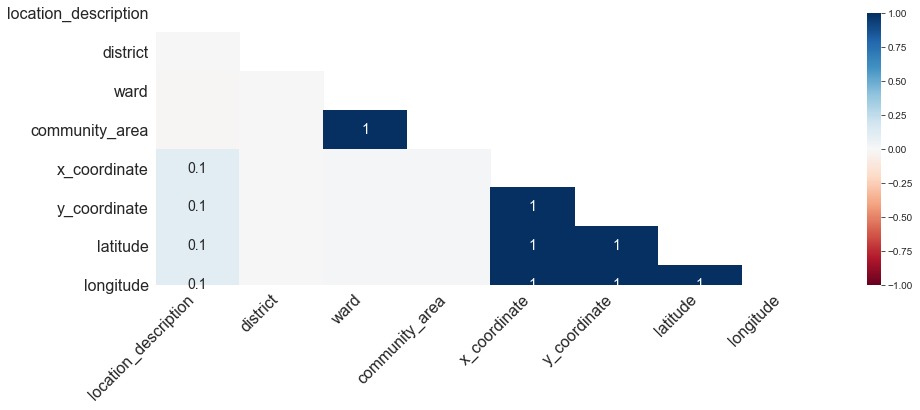

In [9]:
msno.heatmap(crimes,figsize=(15, 5))

In [10]:
crimes.isnull().sum()

date                         0
block                        0
iucr                         0
primary_type                 0
description                  0
location_description      8190
arrest                       0
domestic                     0
beat                         0
district                    47
ward                    614835
community_area          613484
fbi_code                     0
x_coordinate             72136
y_coordinate             72136
year                         0
updated_on                   0
latitude                 72136
longitude                72136
dtype: int64

In [11]:
crimes.dropna(subset=['latitude'],inplace=True)
crimes.reset_index(drop=True,inplace=True)

In [12]:
crimes.dropna(inplace=True)
crimes.reset_index(drop=True,inplace=True)

In [13]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626786 entries, 0 to 6626785
Data columns (total 19 columns):
date                    object
block                   object
iucr                    object
primary_type            object
description             object
location_description    object
arrest                  bool
domestic                bool
beat                    int64
district                float64
ward                    float64
community_area          float64
fbi_code                object
x_coordinate            float64
y_coordinate            float64
year                    int64
updated_on              object
latitude                float64
longitude               float64
dtypes: bool(2), float64(7), int64(2), object(8)
memory usage: 872.1+ MB


In [14]:
crimes.date = pd.to_datetime(crimes.date)
crimes['day_of_week'] = crimes.date.dt.day_name()
crimes['month'] = crimes.date.dt.month_name()
crimes['time'] = crimes.date.dt.hour

In [15]:
crimes

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,day_of_week,month,time
0,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,...,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,Saturday,September,13
1,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,...,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,Friday,September,11
2,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,...,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,Saturday,September,12
3,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,...,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,Saturday,September,13
4,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,...,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,Saturday,September,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6626781,2021-03-01 00:00:00,101XX S LUELLA AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,431,4.0,...,11,1193169.0,1838168.0,2021,04/21/2021 04:49:40 PM,41.710890,-87.568176,Monday,March,0
6626782,2021-01-02 09:00:00,023XX N COMMONWEALTH AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,False,False,1814,18.0,...,17,1173456.0,1915754.0,2021,04/21/2021 04:52:37 PM,41.924251,-87.638070,Saturday,January,9
6626783,2021-04-14 00:00:00,039XX W DIVISION ST,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,APARTMENT,False,True,2535,25.0,...,08B,1149740.0,1907713.0,2021,04/21/2021 04:52:37 PM,41.902680,-87.725422,Wednesday,April,0
6626784,2021-04-14 19:09:00,011XX N DEARBORN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,True,False,1824,18.0,...,04A,1175721.0,1908209.0,2021,04/21/2021 04:52:37 PM,41.903497,-87.629975,Wednesday,April,19


In [21]:
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL_ASSAULT',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
crimes['primary_type_grouped'] = crimes.primary_type.map(primary_type_mapping)

In [22]:
zone_mapping = {
    'N' : 'North',
    'S' : 'South',
    'E' : 'East',
    'W' : 'West'
}
crimes['zone'] = crimes.block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

In [23]:
crimes.arrest = crimes.arrest.astype(int)
crimes.domestic = crimes.domestic.astype(int)

In [24]:
# crimes_data_2017 = crimes[crimes.year == 2017]
# crimes_data_2016 = crimes[crimes.year == 2016]

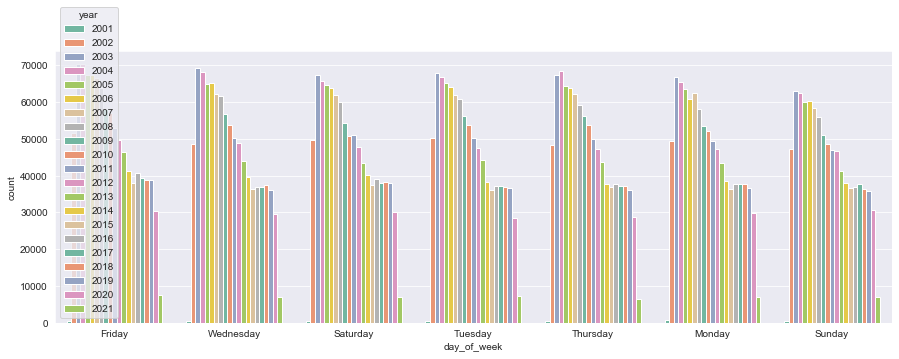

In [25]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=crimes,x='day_of_week',hue='year',order=crimes.day_of_week.value_counts().index,palette='Set2')

In [48]:
crimes_10_years=crimes[(crimes['year']>=2011) & (crimes['year']<=2021)]

In [49]:
crimes_10_years.year = pd.Categorical(crimes_10_years.year)
crimes_10_years.time = pd.Categorical(crimes_10_years.time)
crimes_10_years.domestic = pd.Categorical(crimes_10_years.domestic)
crimes_10_years.arrest = pd.Categorical(crimes_10_years.arrest)
crimes_10_years.beat = pd.Categorical(crimes_10_years.beat)
crimes_10_years.district = pd.Categorical(crimes_10_years.district)
crimes_10_years.ward = pd.Categorical(crimes_10_years.ward)
crimes_10_years.community_area = pd.Categorical(crimes_10_years.community_area)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [50]:
crimes_data_prediction = crimes_10_years.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate'],axis=1)

In [51]:
crimes_data_prediction.head()

,arrest,domestic,beat,district,ward,community_area,year,latitude,longitude,day_of_week,month,time,primary_type_grouped,zone
0,0,1,924,9.0,12.0,61.0,2015,41.815117,-87.670000,Saturday,September,13,NON-CRIMINAL_ASSAULT,South
1,0,0,1511,15.0,29.0,25.0,2015,41.895080,-87.765400,Friday,September,11,THEFT,North
2,1,0,1412,14.0,35.0,21.0,2015,41.937406,-87.716650,Saturday,September,12,NARCOTIC_OFFENSE,West
3,0,1,1522,15.0,28.0,25.0,2015,41.881903,-87.755121,Saturday,September,13,NON-CRIMINAL_ASSAULT,North
4,0,0,614,6.0,21.0,71.0,2015,41.744379,-87.658431,Saturday,September,10,THEFT,South


In [52]:
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)

In [53]:
crimes_data_prediction.head()

,latitude,longitude,arrest_1,domestic_1,beat_112,beat_113,beat_114,beat_121,beat_122,beat_123,...,primary_type_grouped_HUMAN_TRAFFICKING_OFFENSE,primary_type_grouped_NARCOTIC_OFFENSE,primary_type_grouped_NON-CRIMINAL_ASSAULT,primary_type_grouped_OTHER_OFFENSE,primary_type_grouped_SEXUAL_OFFENSE,primary_type_grouped_THEFT,primary_type_grouped_WEAPONS_OFFENSE,zone_North,zone_South,zone_West
0,41.815117,-87.670000,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,41.895080,-87.765400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,41.937406,-87.716650,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,41.881903,-87.755121,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,41.744379,-87.658431,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction.drop(['arrest_1'],axis=1),crimes_data_prediction['arrest_1'], test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [34]:
# from sklearn.preprocessing import OneHotEncoder
# enc=OneHotEncoder(handle_unknown='ignore')
# enc.fit(X_train)
# X_train=enc.transform(X_train)
# X_test=enc.transform(X_test)

In [61]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [62]:
y_pred = classifier.predict(X_test)

In [63]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[196081 235856]
 [ 29458 105091]]


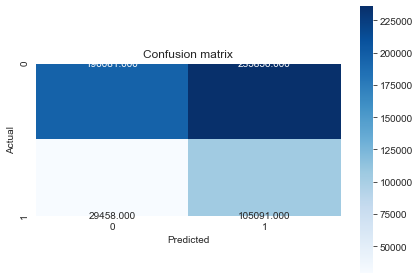

In [64]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [65]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5316495023707558
Error =  0.4683504976292442
Precision =  0.3082326578617791
Recall =  0.7810611747393144
F-1 Score =  0.44202685196089975
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.45      0.60    431937
           1       0.31      0.78      0.44    134549

    accuracy                           0.53    566486
   macro avg       0.59      0.62      0.52    566486
weighted avg       0.74      0.53      0.56    566486



In [55]:
classifier_l = LogisticRegression(random_state=42)

In [56]:
classifier_l.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

In [57]:
y_pred_l = classifier_l.predict(X_test)

In [58]:
conf_matrix_l = metrics.confusion_matrix(y_test, y_pred_l)
print(conf_matrix_l)

[[428840   3097]
 [ 83030  51519]]


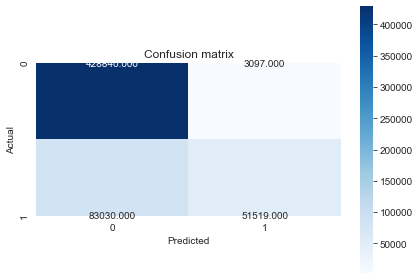

In [59]:
sns.heatmap(conf_matrix_l, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [60]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred_l))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred_l))
print('Precision = ',metrics.precision_score(y_test, y_pred_l,))
print('Recall = ',metrics.recall_score(y_test, y_pred_l))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred_l))
print('Classification Report\n',metrics.classification_report(y_test, y_pred_l))

Accuracy =  0.847962703403085
Error =  0.152037296596915
Precision =  0.9432950051267028
Recall =  0.3829013965172539
F-1 Score =  0.544699072238522
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.99      0.91    431937
           1       0.94      0.38      0.54    134549

    accuracy                           0.85    566486
   macro avg       0.89      0.69      0.73    566486
weighted avg       0.86      0.85      0.82    566486

